<h1>
    Dengue Data Analysis
</h1>
<h2>
    Jeanne Nicole Gianan
</h2>

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [13]:
dengue = pd.read_csv('datasets/dengue.csv')
dengue

,Month,Year,Region,Dengue_Cases,Dengue_Deaths
0,January,2016,Region I,705,1
1,February,2016,Region I,374,0
2,March,2016,Region I,276,0
3,April,2016,Region I,240,2
4,May,2016,Region I,243,1
...,...,...,...,...,...
1015,August,2020,BARMM,91,0
1016,September,2020,BARMM,16,8
1017,October,2020,BARMM,13,9
1018,November,2020,BARMM,15,1


In [14]:
dengue.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1020 entries, 0 to 1019
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Month          1020 non-null   object
 1   Year           1020 non-null   int64 
 2   Region         1020 non-null   object
 3   Dengue_Cases   1020 non-null   int64 
 4   Dengue_Deaths  1020 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 40.0+ KB


In [16]:
dengue.dtypes

Month            object
Year              int64
Region           object
Dengue_Cases      int64
Dengue_Deaths     int64
dtype: object

In [17]:
dengue['Year'] = dengue['Year'].astype('int')
dengue .dtypes

Month            object
Year              int64
Region           object
Dengue_Cases      int64
Dengue_Deaths     int64
dtype: object

<h1> DENGUE CASES TREND FROM 2016 - 2020 </h1>

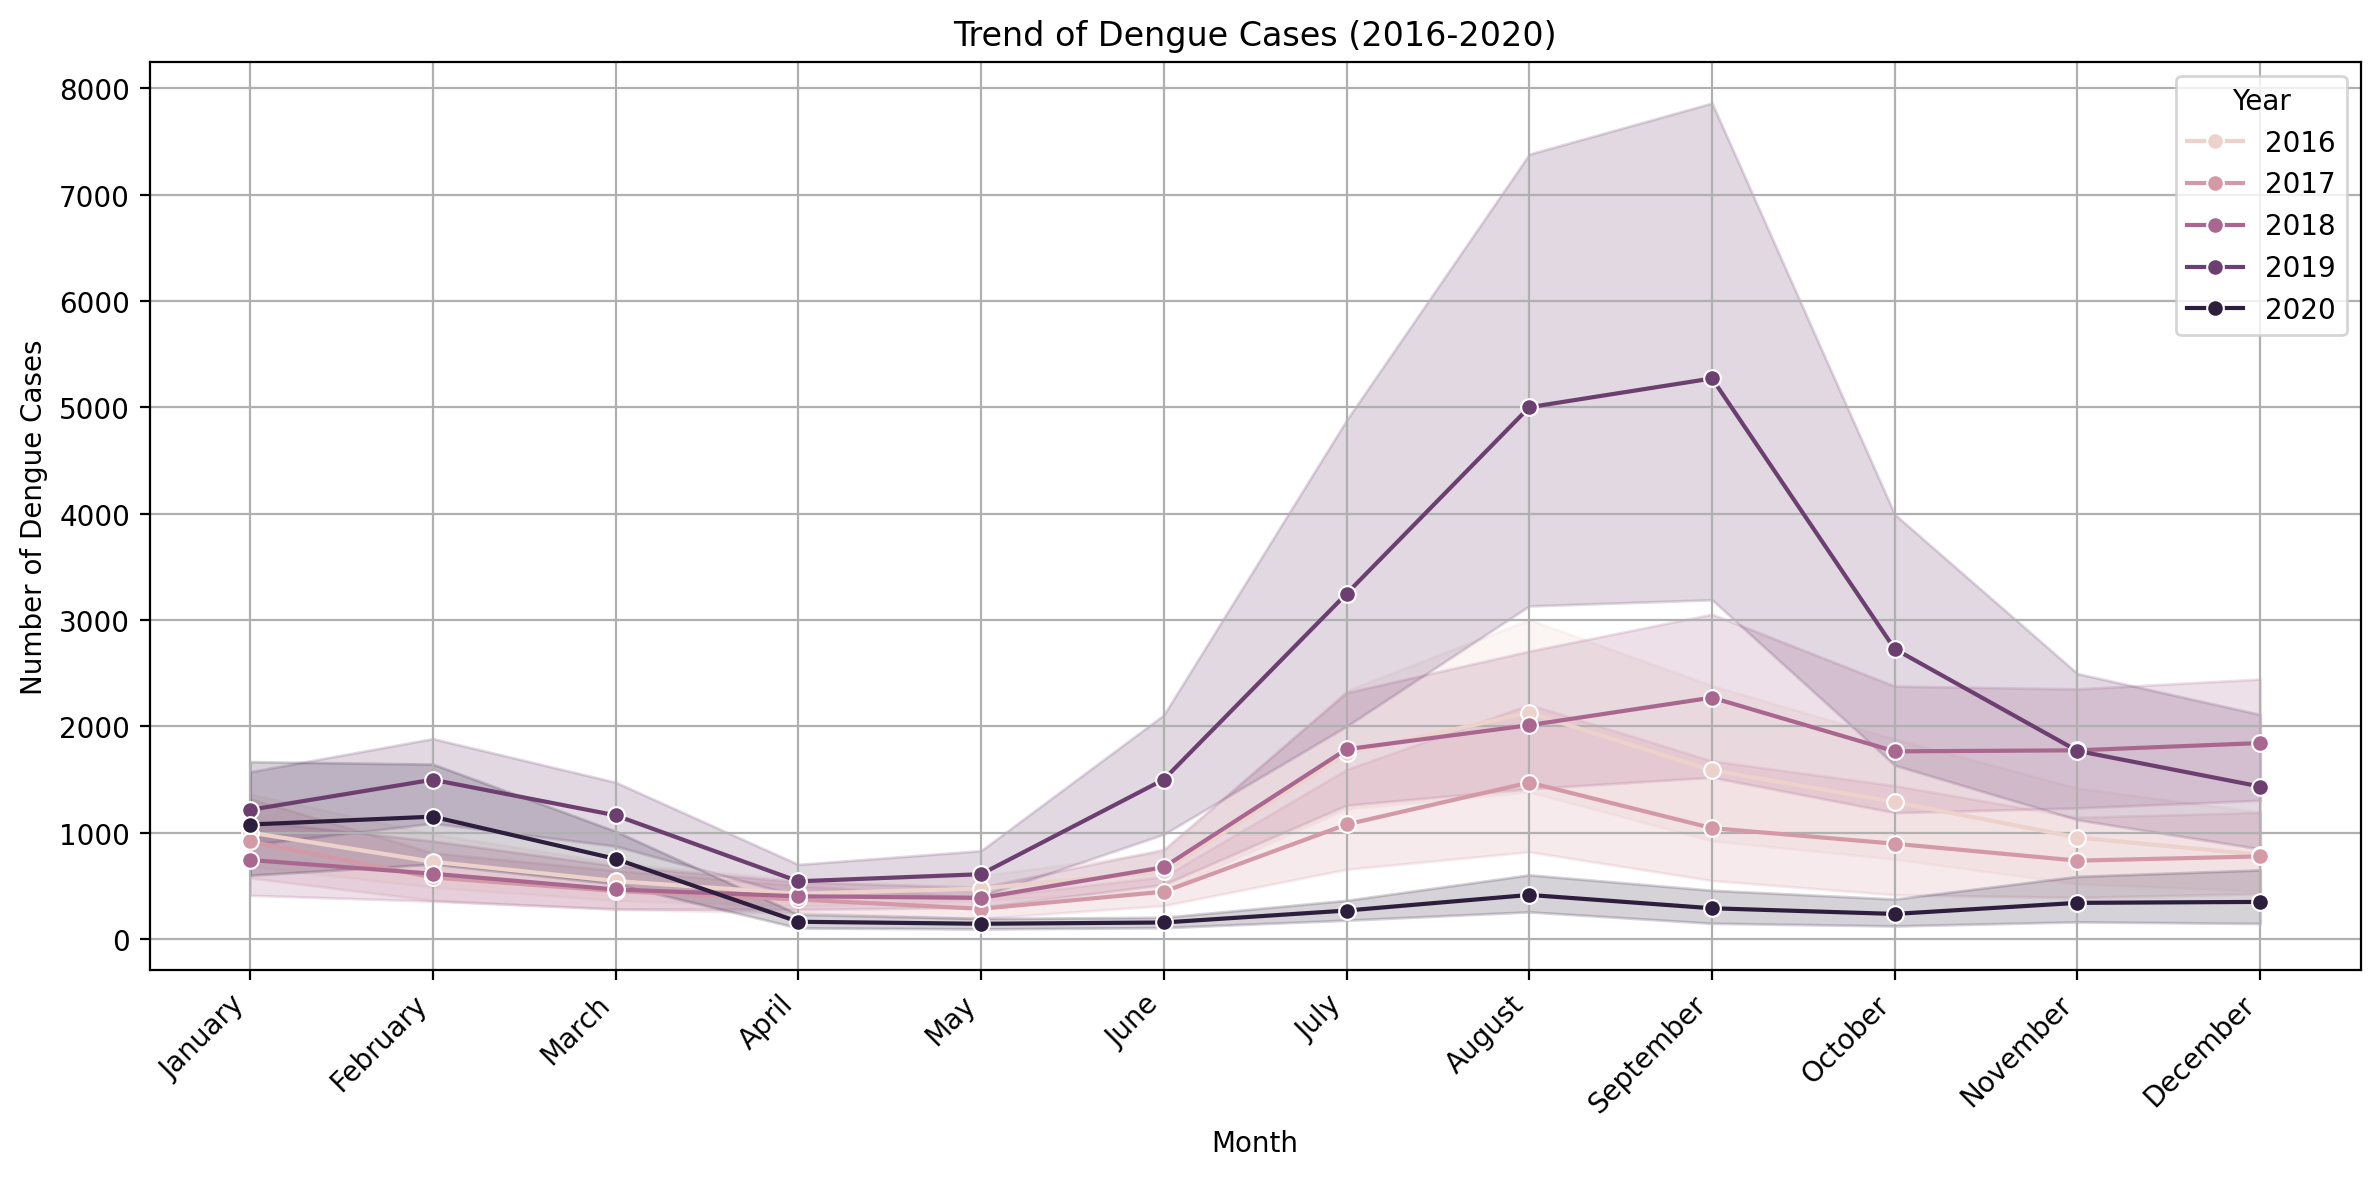

In [18]:
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']
dengue['Month'] = pd.Categorical(dengue['Month'], categories=month_order, ordered=True)

# Create the line plot
plt.figure(figsize=(12, 6))
sns.lineplot(x='Month', y='Dengue_Cases', hue='Year', data=dengue, marker='o')
plt.title('Trend of Dengue Cases (2016-2020)')
plt.xlabel('Month')
plt.ylabel('Number of Dengue Cases')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Year')
plt.grid(True)
plt.tight_layout()
plt.show()

<h2>
    Insight #1
</h2>
<h3>
    Dengue cases rise and fall within each year, typically peaking between August and September, likely correlating with the rainy or mosquito breeding season.
</h3>
<br>
<h2>
    Insight #2
</h2>
<h3>
    The total and peak numbers of cases vary by year. Especially in the year 2019. Maybe due the amount of cases in 2019, the government take actions to lower the cases thatswhy when 2020 comes the cases of dengue was the lowest even in peak season.
</h3>

<h1> ANALYSIS OF DENGUE CASES PER REGION </h1>

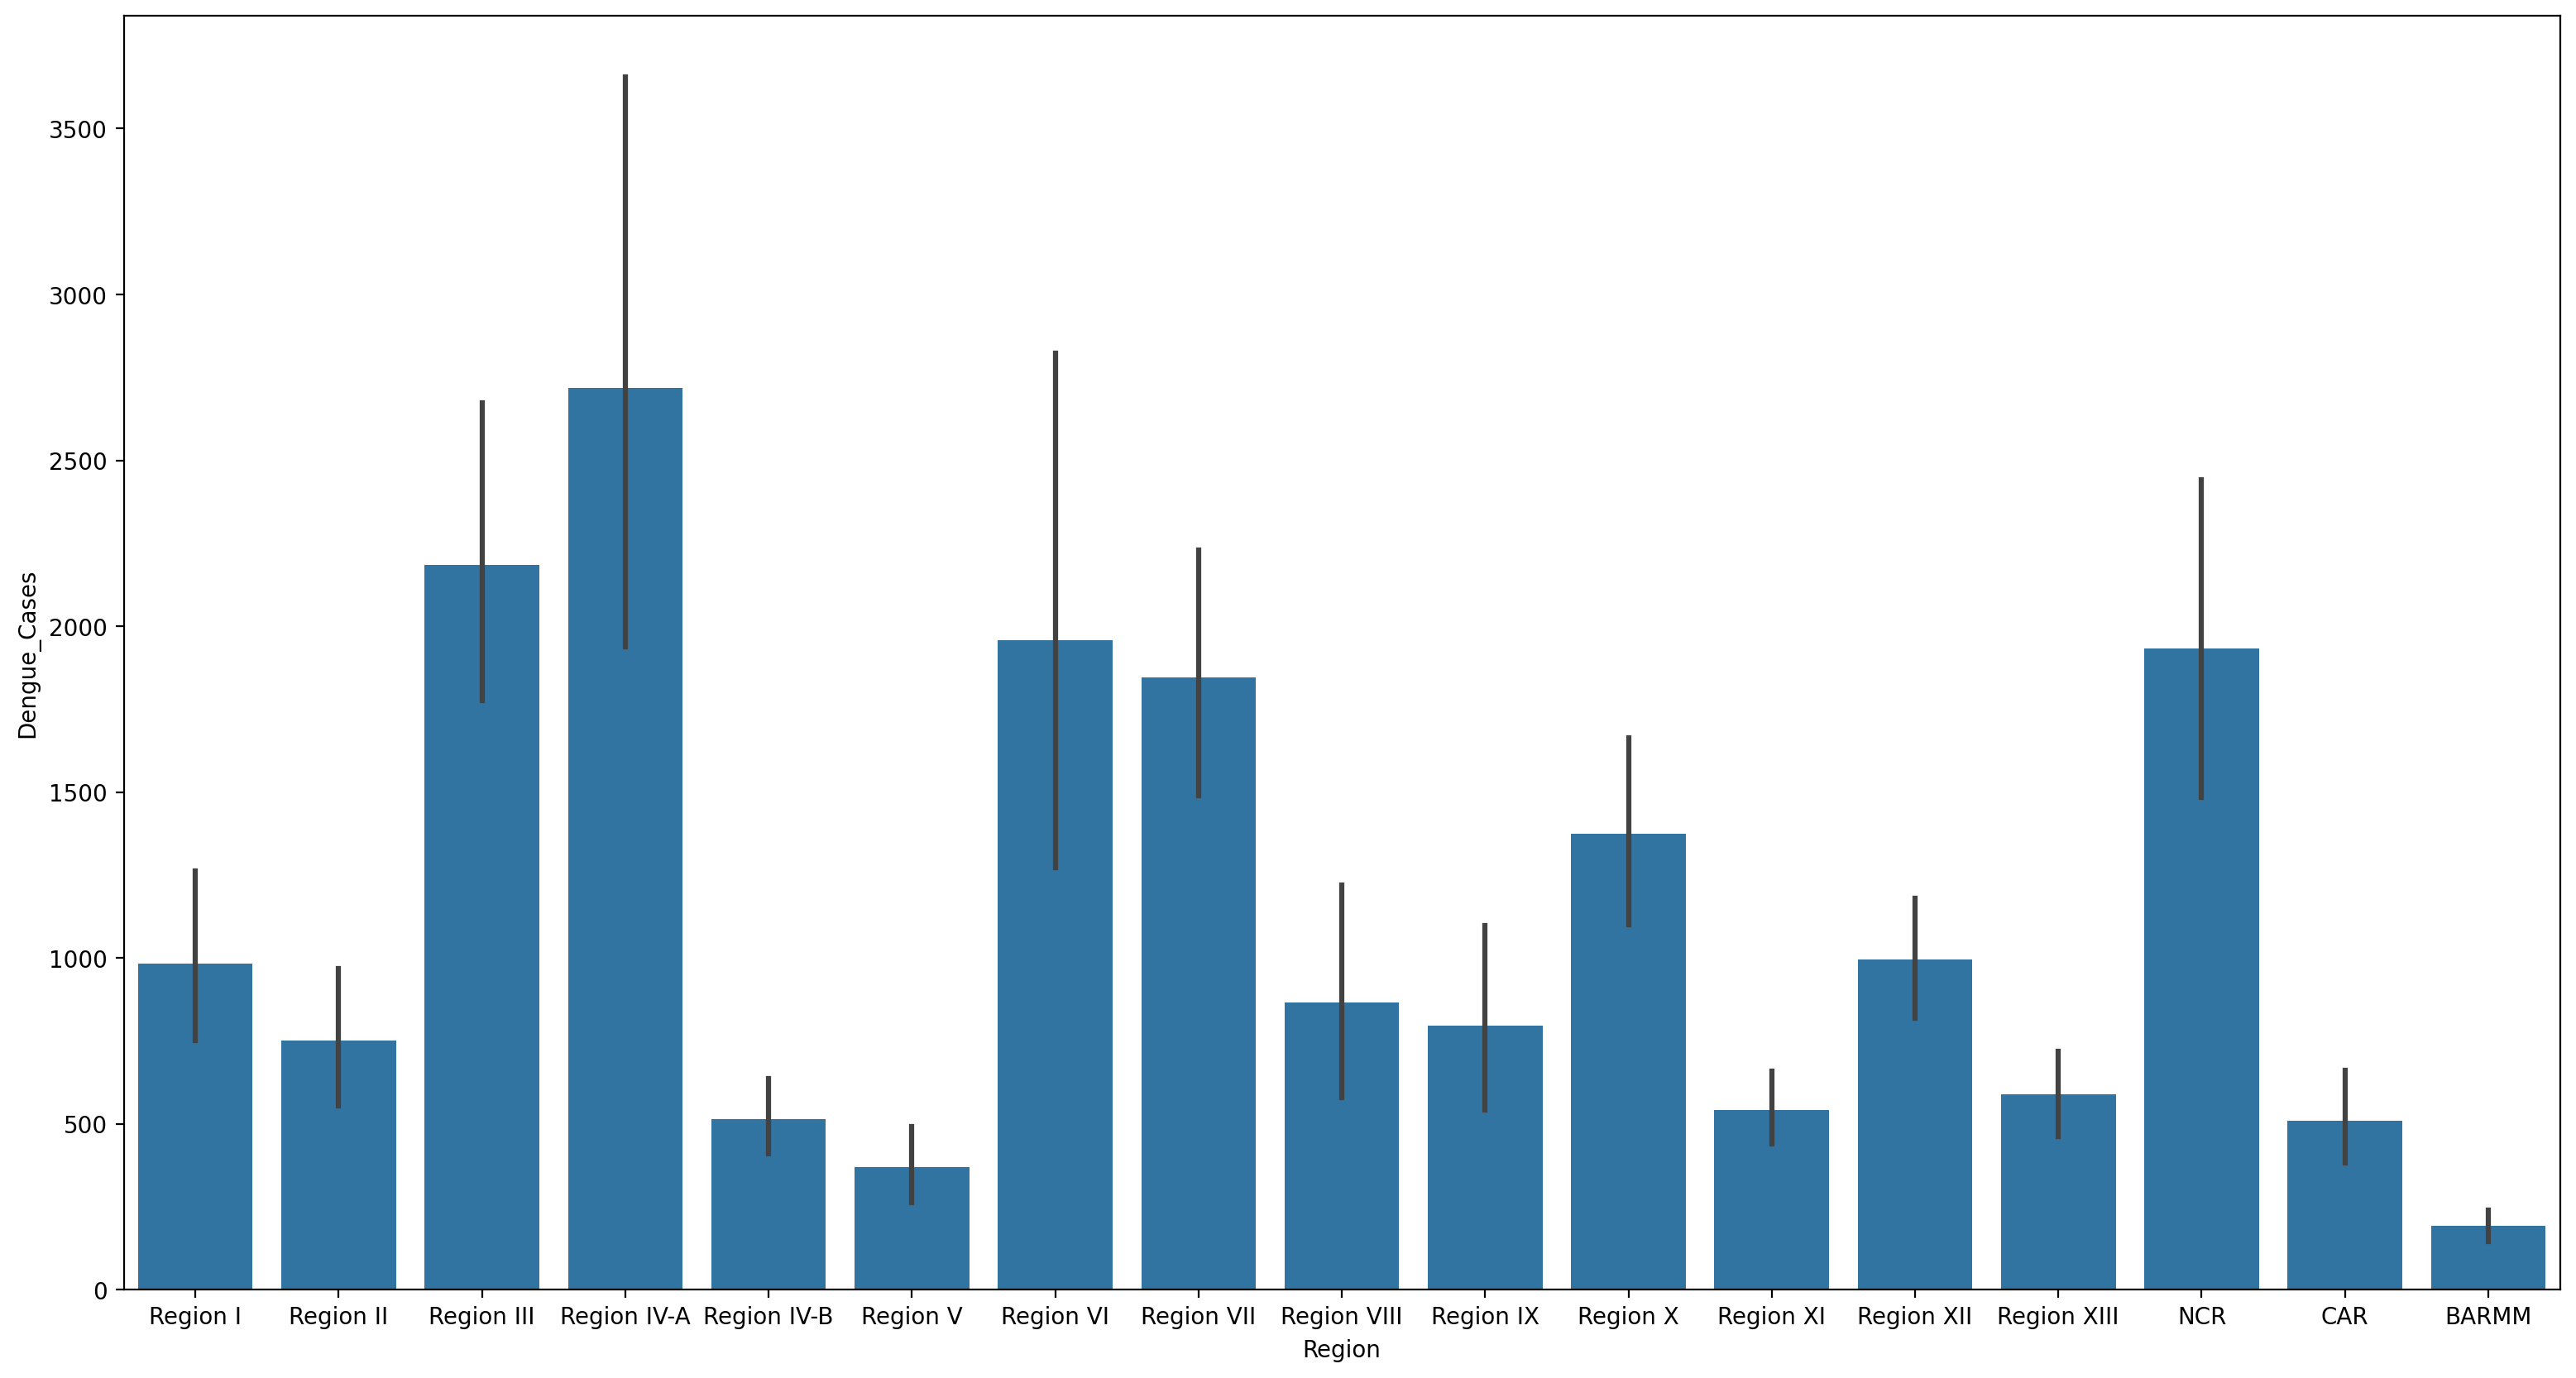

In [19]:
visual1 = sns.barplot(data=dengue, x='Region', y="Dengue_Cases")
plt.gcf().set_size_inches(19,10)
plt.show()

<h2>
    Insight #3
</h2>
<h3>
    Certain regions have consistently higher dengue case counts, indicating geographic hotspots that may need targeted interventions, such as Region IV-A , Region III and NCR.
</h3>
<br>
<h2>
    Insight #4
</h2>
<h3>
    Regions with lower case counts might have either better mosquito control measures or environmental factors less conducive to dengue transmission. It can also be because there are less population in other region unlike the top 3 region with most cases.
</h3>

<h1> Mortality Rate per each Region </h1>

In [21]:
Regional_Death = dengue.groupby(["Region"])[['Dengue_Deaths', 'Dengue_Cases']].sum().reset_index()
Regional_Death

,Region,Dengue_Deaths,Dengue_Cases
0,BARMM,332,11537
1,CAR,1008,30582
2,NCR,4008,115966
3,Region I,157,59066
4,Region II,193,45141
5,Region III,482,131064
6,Region IV-A,652,163029
7,Region IV-B,130,30849
8,Region IX,532,47781
9,Region V,185,22167


In [23]:
# Calculate mortality rate
Regional_Death["Mortality_Rate"] = np.round((Regional_Death["Dengue_Deaths"] / Regional_Death["Dengue_Cases"]) * 100,2)
Regional_Death


,Region,Dengue_Deaths,Dengue_Cases,Mortality_Rate
0,BARMM,332,11537,2.88
1,CAR,1008,30582,3.30
2,NCR,4008,115966,3.46
3,Region I,157,59066,0.27
4,Region II,193,45141,0.43
5,Region III,482,131064,0.37
6,Region IV-A,652,163029,0.40
7,Region IV-B,130,30849,0.42
8,Region IX,532,47781,1.11
9,Region V,185,22167,0.83


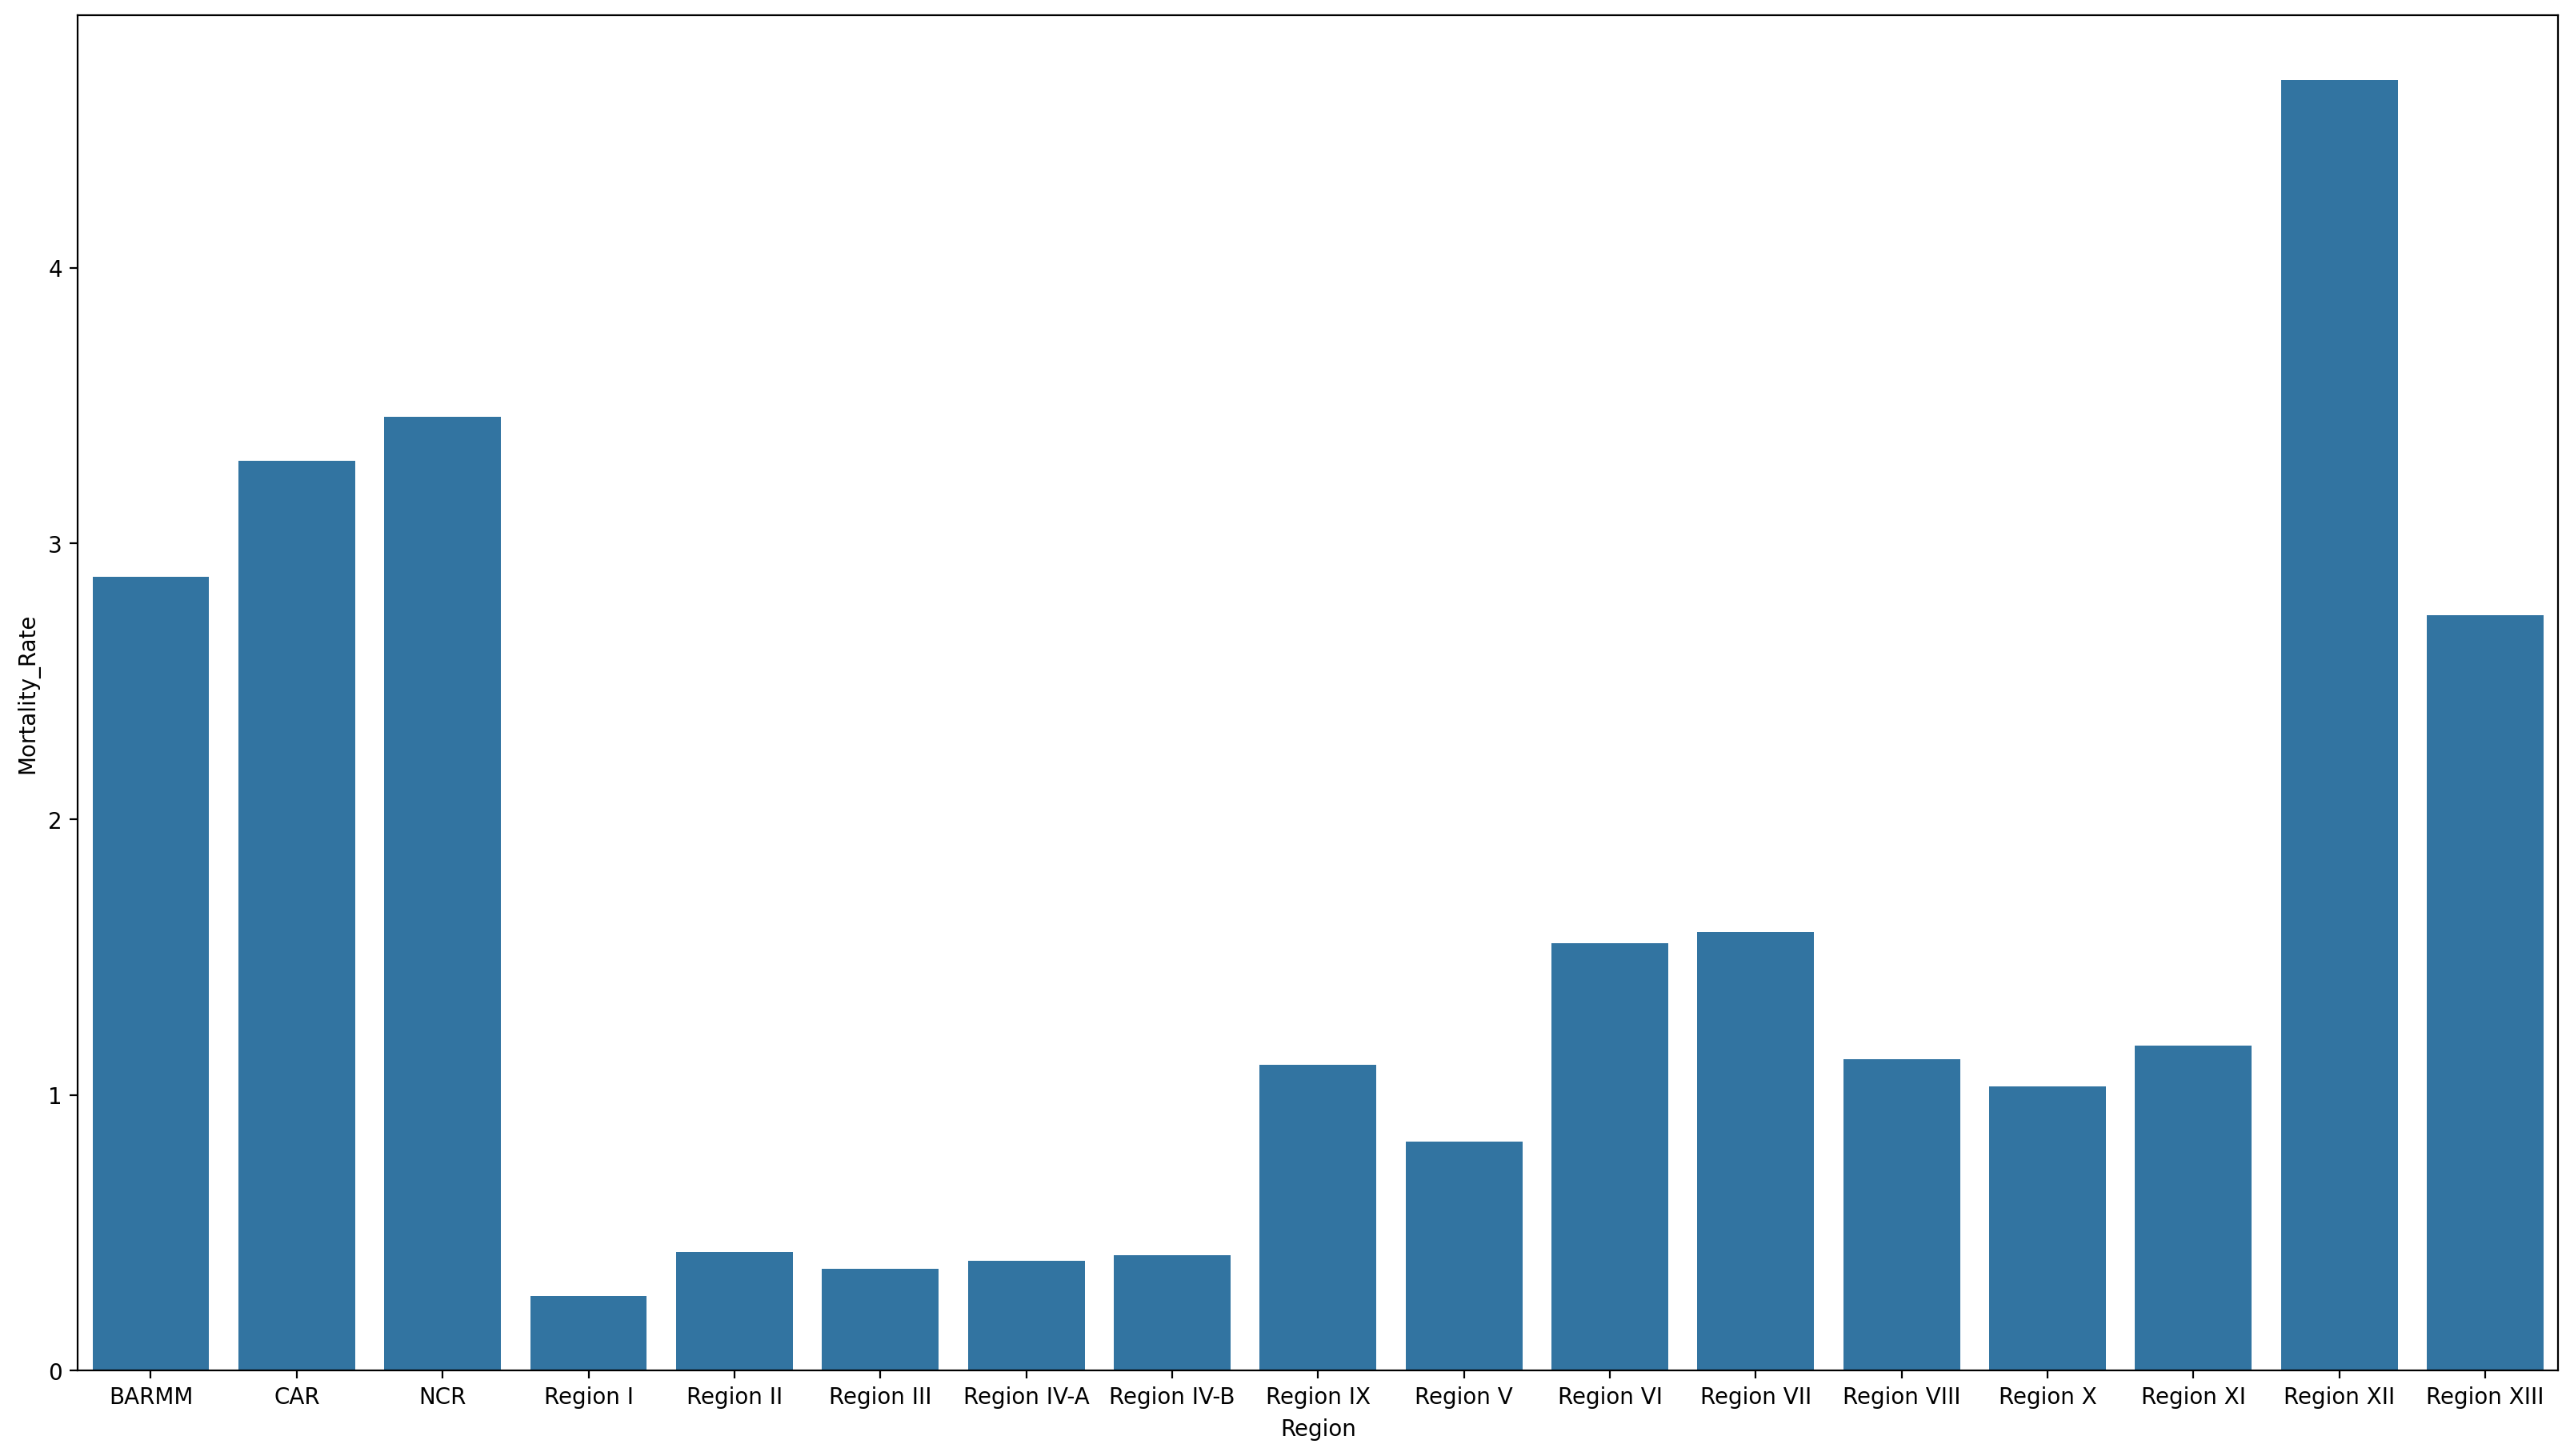

In [24]:
visual2 = sns.barplot(data=Regional_Death, x="Region",y="Mortality_Rate")
plt.gcf().set_size_inches(20,11)
plt.show()

<h2>
    Insight #5
</h2>
<h3>
    The Region with the highest mortality rate are Region XII, NCR and CAR. Region XII and NCR region is a highly urbanized city which means that there would be a lot of people that might affect the proportion for the mortality rate, meanwhile CAR is the opposite, which could mean that it can be due to the lack of resources to treat patients with dengue cases.
</h3>
<br>
<h2>
    Insight #6
</h2>
<h3>
    Regions with higher mortality rates might indicate weaker healthcare or delayed treatment, one of the reason might be because of the high amount of patients causing for delayed treatment, suggesting focus areas for intervention.
</h3>
<br>
<h2>
    Insight #7
</h2>
<h3>
    Identifying regions with low mortality but high cases could indicate effective healthcare response, serving as models. An example of this are Region III and IV-A.
</h3>

<h1> Mortality per Region thru Heat Map </h1>

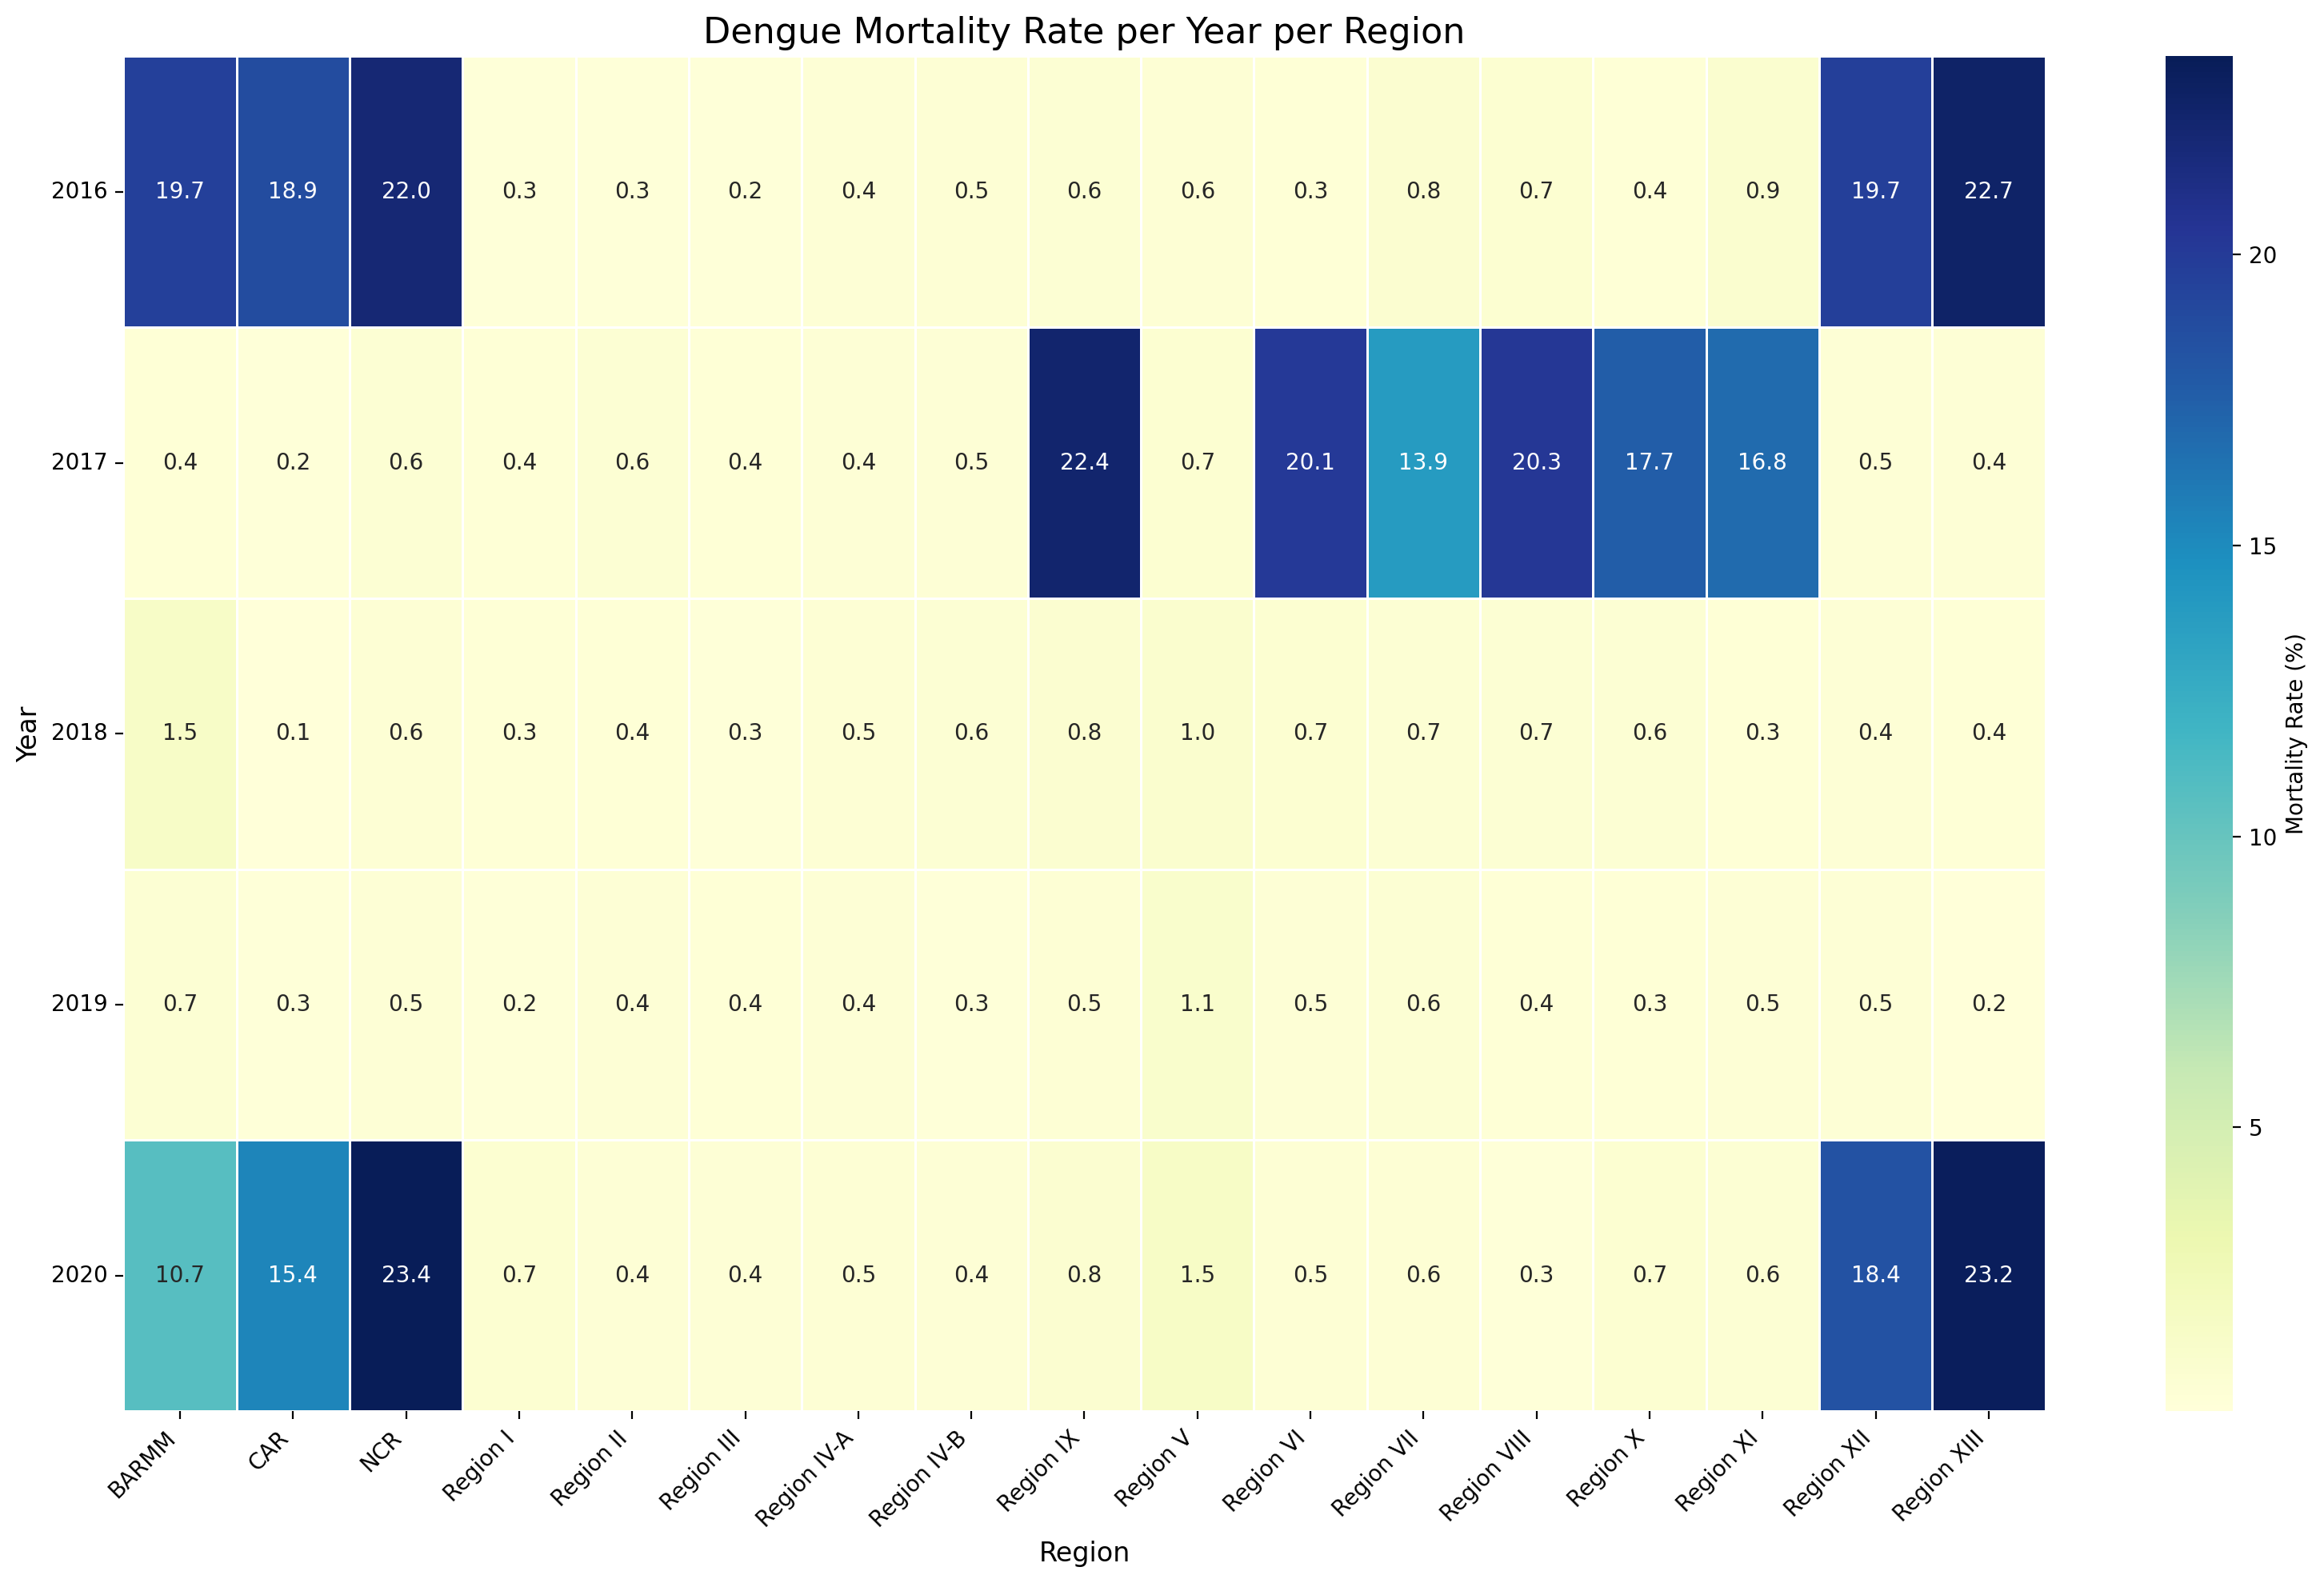

In [25]:

dengue['Mortality_Rate'] = (dengue['Dengue_Deaths'] / dengue['Dengue_Cases']) * 100

# Group by Year and Region and calculate the mean mortality rate
heatmap_data = dengue.groupby(['Year', 'Region'])['Mortality_Rate'].mean().unstack()

# Create the heatmap
plt.figure(figsize=(16, 10))
sns.heatmap(heatmap_data, annot=True, fmt=".1f", cmap="YlGnBu", linewidths=.5, cbar_kws={'label': 'Mortality Rate (%)'})
plt.title('Dengue Mortality Rate per Year per Region', fontsize=16)
plt.xlabel('Region', fontsize=12)
plt.ylabel('Year', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

<h2>
    Insight #8
</h2>
<h3>
    The heatmap reveals that Region XII experienced a sharp mortality rate spike in 2017, reaching nearly 5%, double its rates in adjacent years, indicating a potential outbreak or healthcare failure that year. And when 2020 comes the morality rate spike one again but lower than the year 2017.
    
</h3>
<br>
<h2>
    Insight #9
</h2>
<h3>
   Region III and IV-A maintains mortality below 1% throughout the period despite high case numbers, demonstrating effective clinical management.
</h3>
<br>
<h2>
    Insight #10
</h2>
<h3>
    2019 was the year with the highest cases of dengue recoded but despite that the heatmap shows that none of the region had a spike in mortality rate.
</h3>